In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot(x,y):
    plt.plot(x,'r', label='x')
    plt.plot(y, 'g', label='y')
    plt.title("Plot of X and Y")
    plt.legend();
    
def mat_plot(mat, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.matshow(mat, cmap=plt.cm.Blues)
    plt.gca().invert_yaxis()
    
    for i in range(len(x)):
        for j in range(len(y)):
            c = mat[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

In [3]:
def f_euclidean_mat(x, y):
    euclidean_mat = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            euclidean_mat[i,j] = (x[j]-y[i])**2  
    return euclidean_mat

def f_dtw_mat(x, y, euclidean_mat):
    dtw_mat = np.zeros((len(y), len(x)))
    dtw_mat[0,0] = euclidean_mat[0,0]
    
    for i in range(1, len(x)):
        dtw_mat[0,i] = euclidean_mat[0,i] + dtw_mat[0, i-1]

    for i in range(1, len(y)):
        dtw_mat[i,0] = euclidean_mat[i, 0] + dtw_mat[i-1, 0]
    
    for i in range(1, len(y)):
        for j in range(1, len(x)):
            dtw_mat[i, j] = euclidean_mat[i,j] + min(dtw_mat[i-1, j-1], dtw_mat[i-1, j], dtw_mat[i, j-1])
    
    return dtw_mat

In [4]:
def dtw_path(x, y, dtw_mat, euclidean_mat):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i>0 and j>0:
#     print(dtw_mat[i-1, j], dtw_mat[i, j-1], min(dtw_mat[i-1, j-1], dtw_mat[i-1, j], dtw_mat[i, j-1]))
#     print(i,j)
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if dtw_mat[i-1, j-1] == min(dtw_mat[i-1, j-1], dtw_mat[i-1, j], dtw_mat[i, j-1]):
                i = i - 1
                j = j - 1
            elif dtw_mat[i-1, j] == min(dtw_mat[i-1, j-1], dtw_mat[i-1, j], dtw_mat[i, j-1]):
                i = i - 1
            elif dtw_mat[i, j-1] == min(dtw_mat[i-1, j-1], dtw_mat[i-1, j], dtw_mat[i, j-1]):
                j = j - 1
        path.append([j, i])
    path.append([0,0])

    for [y, x] in path:
        cost = cost + euclidean_mat[x, y]

    return path, cost

def plot_dtw_path(path):
    path_x = [point[0] for point in path]
    path_y = [point[1] for point in path]
    mat_plot(dtw_mat, "Plot of DTW Path")
    plt.plot(path_x, path_y);

In [5]:
def plot_correlation(x, y, path):
    plt.figure()
    plt.title("Correlation plot")
    plt.plot(x, 'bo-' ,label='x')
    plt.plot(y, 'g^-', label = 'y')
    plt.legend();
    for [map_x, map_y] in path:
#         print(map_x, x[map_x], ":", map_y, y[map_y])
        plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')

Cost: 65.0


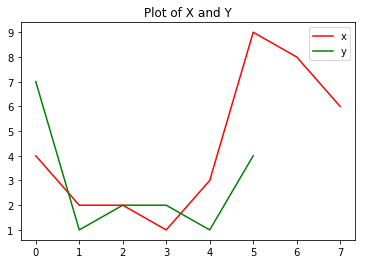

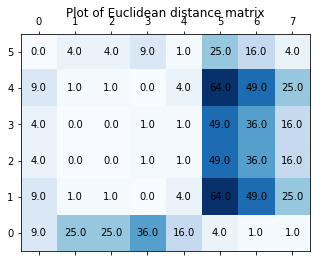

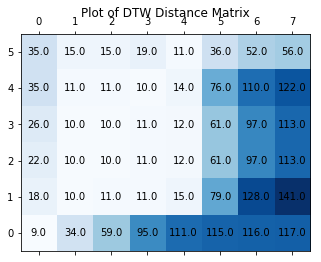

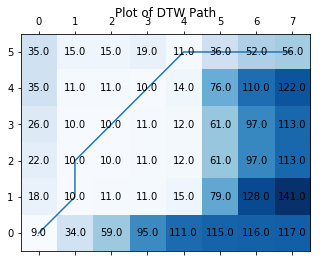

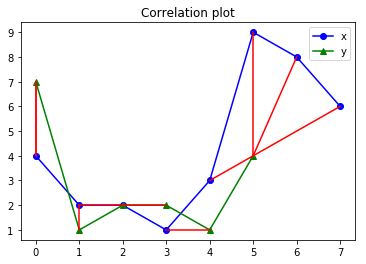

In [6]:
x = np.array([4,2,2,1,3,9,8,6])
y = np.array([7,1,2,2,1,4])

plot(x,y)

euclidean_mat = f_euclidean_mat(x,y)
mat_plot(euclidean_mat, "Plot of Euclidean distance matrix")

dtw_mat = f_dtw_mat(x,y,euclidean_mat)
mat_plot(dtw_mat, "Plot of DTW Distance Matrix")

path, cost = dtw_path(x, y, dtw_mat, euclidean_mat)
plot_dtw_path(path)

plot_correlation(x, y, path)

print("Cost: " + str(cost))

Cost: 2.0


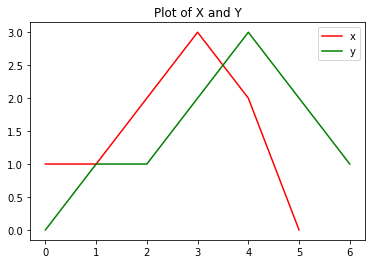

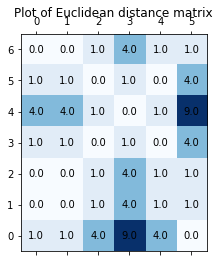

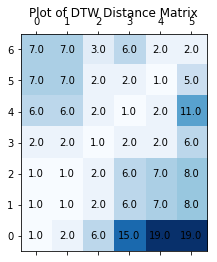

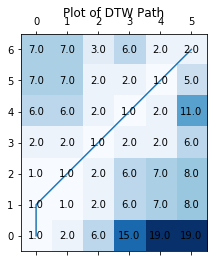

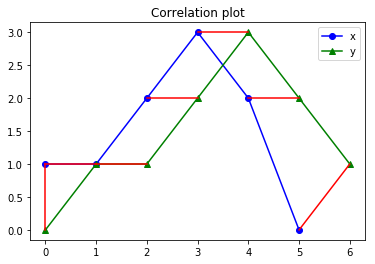

In [7]:
x = np.array([1, 1, 2, 3, 2, 0])
y = np.array([0, 1, 1, 2, 3, 2, 1])

plot(x,y)

euclidean_mat = f_euclidean_mat(x,y)
mat_plot(euclidean_mat, "Plot of Euclidean distance matrix")

dtw_mat = f_dtw_mat(x,y,euclidean_mat)
mat_plot(dtw_mat, "Plot of DTW Distance Matrix")

path, cost = dtw_path(x, y, dtw_mat, euclidean_mat)
plot_dtw_path(path)

plot_correlation(x, y, path)

print("Cost: " + str(cost))